In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [4]:
folder = '/Users/KimQHwan/Development/data/digit-recognizer'
df_train = pd.read_csv(os.path.join(folder, 'train.csv'))
df_test = pd.read_csv(os.path.join(folder, 'test.csv'))

In [6]:
print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [8]:
print(df_train.values)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [57]:
x_train, x_val, y_train, y_val = train_test_split(df_train.values[:,1:], df_train.values[:,0], test_size=0.1)

In [58]:
print(x_train.shape)
print(x_val.shape)

(37800, 784)
(4200, 784)


In [52]:
#x_train = x_train.reshape(-1, 784, 1)
#x_test = x_test.reshape(-1, 784, 1)

In [59]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255

In [60]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [81]:
model = Sequential()
model.add(Dense(units=250, activation='relu', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

In [83]:
early_stopping = EarlyStopping()
hist = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val), callbacks=[early_stopping])

Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 19s 497us/step - loss: 0.2341 - acc: 0.9303 - val_loss: 0.1480 - val_acc: 0.9550
Epoch 2/100
37800/37800 [==============================] - 18s 476us/step - loss: 0.0964 - acc: 0.9693 - val_loss: 0.1367 - val_acc: 0.9583
Epoch 3/100
37800/37800 [==============================] - 18s 476us/step - loss: 0.0644 - acc: 0.9790 - val_loss: 0.1357 - val_acc: 0.9638
Epoch 4/100
37800/37800 [==============================] - 18s 475us/step - loss: 0.0454 - acc: 0.9847 - val_loss: 0.1228 - val_acc: 0.9698
Epoch 5/100
37800/37800 [==============================] - 18s 476us/step - loss: 0.0324 - acc: 0.9892 - val_loss: 0.1196 - val_acc: 0.9719
Epoch 6/100
37800/37800 [==============================] - 18s 477us/step - loss: 0.0259 - acc: 0.9913 - val_loss: 0.1426 - val_acc: 0.9674


In [84]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.1426, final accuracy: 0.9674


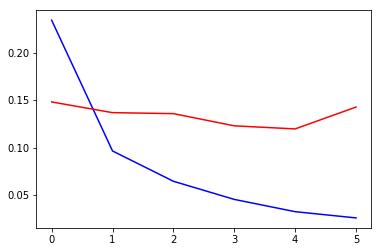

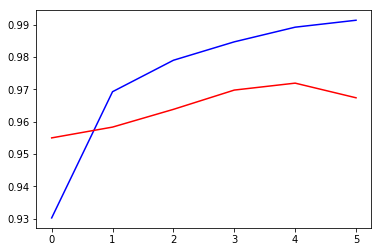

In [85]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [86]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
pprint(cm)

array([[365,   1,   0,   1,   2,   0,   9,   0,   1,   1],
       [  0, 449,   2,   0,   3,   0,   0,   1,   0,   0],
       [  0,   5, 444,   6,   0,   0,   1,   2,   6,   1],
       [  0,   2,   0, 383,   0,   1,   0,   0,   0,   1],
       [  0,   0,   0,   0, 408,   0,   1,   0,   0,   1],
       [  2,   0,   1,   8,   1, 388,   3,   0,   4,   1],
       [  0,   1,   1,   0,   1,   0, 424,   0,   1,   0],
       [  0,   3,   2,   5,   1,   0,   0, 406,   2,   6],
       [  2,   4,   0,   8,   0,   3,   0,   1, 395,   1],
       [  2,   1,   0,   6,  11,   0,   1,   2,   4, 401]])


In [87]:
y_hat = model.predict(df_test.values, batch_size=64)
y_pred = np.argmax(y_hat,axis=1)

In [88]:
with open('submission.csv', 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))